**1. Importing the dependencies**

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

**2. Data Loading & Understanding**

In [347]:
df1 = pd.read_csv("df1.csv")
df2 = pd.read_csv("df2.csv")

Initial Inspection

In [253]:

# Rename a column in the DataFrame
df1.rename(columns={"jundice": "jaundice"}, inplace=True)

In [254]:
df1["Class/ASD"] = df1["Class/ASD"].replace({"YES": 1, "NO": 0})

C:\Users\Acer\AppData\Local\Temp\ipykernel_83696\2554441007.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["Class/ASD"] = df1["Class/ASD"].replace({"YES": 1, "NO": 0})


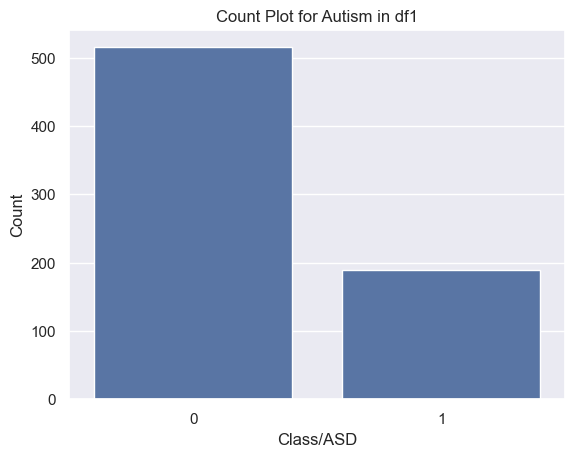

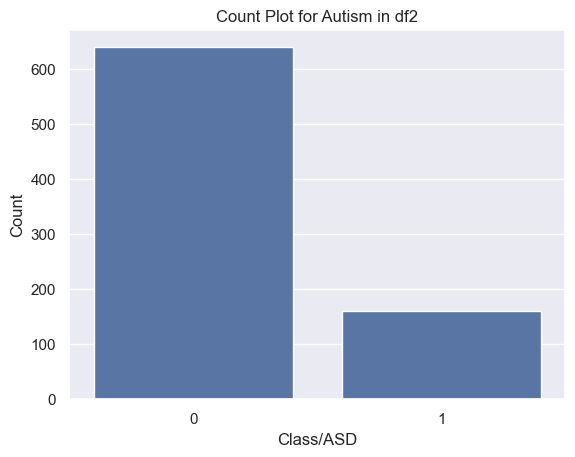

In [255]:
# Count plot for autism in df1
sns.countplot(x=df1["Class/ASD"])
plt.title("Count Plot for Autism in df1")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

# Count plot for autism in df2
sns.countplot(x=df2["Class/ASD"])
plt.title("Count Plot for Autism in df2")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [256]:
# df11= df1[df1["Class/ASD"] == 1]

In [ ]:
df22 = df2.sample(frac=1/3, random_state=42)

In [258]:
# Combine the two DataFrames
df = pd.concat([df1, df22])

# Remove duplicate rows
df = df.drop_duplicates()


In [259]:
df1.head(2)

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   

   A8_Score  A9_Score  A10_Score   age gender       ethnicity jaundice austim  \
0         1         0          0  26.0      f  White-European       no     no   
1         1         0          1  24.0      m          Latino       no    yes   

   contry_of_res used_app_before  result     age_desc relation  Class/ASD  
0  United States              no     6.0  18 and more     Self          0  
1         Brazil              no     5.0  18 and more     Self          0

In [260]:
df2.head(2)

ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         0         1         0         1   
1   2         0         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score        age gender ethnicity jaundice austim  \
0         0         1          1  38.172746      f         ?       no     no   
1         0         0          0  47.750517      m         ?       no     no   

  contry_of_res used_app_before    result     age_desc relation  Class/ASD  
0       Austria              no  6.351166  18 and more     Self          0  
1         India              no  2.255185  18 and more     Self          0

In [261]:
df.head()

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score   age gender       ethnicity jaundice austim  \
0         1         0          0  26.0      f  White-European       no     no   
1         1         0          1  24.0      m          Latino       no    yes   
2         1         1          1  27.0      m          Latino      yes    yes   
3         1         0          1  35.0      f  White-European       no    yes   
4         1         0          0  40.0      f               ?       no     no   

   contry_of_res used_app_before  result     age_desc relation  Class/ASD  ID  
0  United States              no     6.0  18 and more     Self          0 NaN  
1         Brazil              no     5.0  18 and more     Self          0 NaN  
2          Spain              no     8.0  18 and more   Parent          1 NaN  
3  United States              no     6.0  18 and more     Self          0 NaN  
4          Egypt              no     2.0  18 and more        ?          0 NaN

In [262]:
df["Class/ASD"].unique()

array([0, 1])

In [263]:
df["Class/ASD"] = df["Class/ASD"].replace({"YES": 1, "NO": 0})

In [264]:
df.drop(columns=["ID","age_desc"], inplace=True)

In [265]:
df.isna().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
relation           0
Class/ASD          0
dtype: int64

In [266]:
df.dropna(inplace=True)

In [267]:
df.shape

(777, 20)

In [268]:
df.head()

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score   age gender       ethnicity jaundice austim  \
0         1         0          0  26.0      f  White-European       no     no   
1         1         0          1  24.0      m          Latino       no    yes   
2         1         1          1  27.0      m          Latino      yes    yes   
3         1         0          1  35.0      f  White-European       no    yes   
4         1         0          0  40.0      f               ?       no     no   

   contry_of_res used_app_before  result relation  Class/ASD  
0  United States              no     6.0     Self          0  
1         Brazil              no     5.0     Self          0  
2          Spain              no     8.0   Parent          1  
3  United States              no     6.0     Self          0  
4          Egypt              no     2.0        ?          0

In [269]:
# Convert 'age' and 'result' columns to integer
df[['age', 'result']] = df[['age', 'result']].astype(int)

In [270]:
df = df.drop_duplicates()

In [271]:
df.shape

(777, 20)

In [272]:
df.tail()

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
199         1         1         0         1         1         0         0   
365         0         1         0         1         0         0         1   
486         1         1         1         0         0         0         0   
594         0         0         0         0         0         0         0   
568         1         0         1         0         0         1         0   

     A8_Score  A9_Score  A10_Score  age gender       ethnicity jaundice  \
199         1         0          0   18      m  White-European      yes   
365         1         1          1   30      m           Asian       no   
486         0         1          1   32      m  White-European       no   
594         1         0          1   31      f               ?       no   
568         0         1          1   18      f  White-European      yes   

    austim         contry_of_res used_app_before  result relation  Class/ASD  
199     no  United Arab Emirates              no      12     Self          0  
365     no             Sri Lanka              no       9     Self          0  
486     no            Kazakhstan              no       8     Self          0  
594     no               Austria              no       0     Self          0  
568     no                France              no       8     Self          0

In [273]:
# display all columns of a dataframe
pd.set_option('display.max_columns', None)

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, 0 to 568
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         777 non-null    int64 
 1   A2_Score         777 non-null    int64 
 2   A3_Score         777 non-null    int64 
 3   A4_Score         777 non-null    int64 
 4   A5_Score         777 non-null    int64 
 5   A6_Score         777 non-null    int64 
 6   A7_Score         777 non-null    int64 
 7   A8_Score         777 non-null    int64 
 8   A9_Score         777 non-null    int64 
 9   A10_Score        777 non-null    int64 
 10  age              777 non-null    int64 
 11  gender           777 non-null    object
 12  ethnicity        777 non-null    object
 13  jaundice         777 non-null    object
 14  austim           777 non-null    object
 15  contry_of_res    777 non-null    object
 16  used_app_before  777 non-null    object
 17  result           777 non-null    int64 


In [275]:
# # convert age column datatype to integer
# df["age"] = df["age"].astype(int)

In [276]:
df.head(2)

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   

   A8_Score  A9_Score  A10_Score  age gender       ethnicity jaundice austim  \
0         1         0          0   26      f  White-European       no     no   
1         1         0          1   24      m          Latino       no    yes   

   contry_of_res used_app_before  result relation  Class/ASD  
0  United States              no       6     Self          0  
1         Brazil              no       5     Self          0

In [277]:
for col in df.columns:
  numerical_features = ["age", "result"]
  if col not in numerical_features:
    print(col, df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [1 0]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [1 0]
--------------------------------------------------
A5_Score [0 1]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [1 0]
--------------------------------------------------
A9_Score [0 1]
--------------------------------------------------
A10_Score [0 1]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [278]:
df.shape

(777, 20)

In [279]:
df.head(2)

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   

   A8_Score  A9_Score  A10_Score  age gender       ethnicity jaundice austim  \
0         1         0          0   26      f  White-European       no     no   
1         1         0          1   24      m          Latino       no    yes   

   contry_of_res used_app_before  result relation  Class/ASD  
0  United States              no       6     Self          0  
1         Brazil              no       5     Self          0

In [280]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [281]:
df["contry_of_res"].unique()

array(['United States', 'Brazil', 'Spain', 'Egypt', 'New Zealand',
       'Bahamas', 'Burundi', 'Austria', 'Argentina', 'Jordan', 'Ireland',
       'United Arab Emirates', 'Afghanistan', 'Lebanon', 'United Kingdom',
       'South Africa', 'Italy', 'Pakistan', 'Bangladesh', 'Chile',
       'France', 'China', 'Australia', 'Canada', 'Saudi Arabia',
       'Netherlands', 'Romania', 'Sweden', 'Tonga', 'Oman', 'India',
       'Philippines', 'Sri Lanka', 'Sierra Leone', 'Ethiopia', 'Viet Nam',
       'Iran', 'Costa Rica', 'Germany', 'Mexico', 'Russia', 'Armenia',
       'Iceland', 'Nicaragua', 'Hong Kong', 'Japan', 'Ukraine',
       'Kazakhstan', 'AmericanSamoa', 'Uruguay', 'Serbia', 'Portugal',
       'Malaysia', 'Ecuador', 'Niger', 'Belgium', 'Bolivia', 'Aruba',
       'Finland', 'Turkey', 'Nepal', 'Indonesia', 'Angola', 'Azerbaijan',
       'Iraq', 'Czech Republic', 'Cyprus'], dtype=object)

In [282]:
# define the mapping dictionary for country names
mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}

# repalce value in the country column
df["contry_of_res"] = df["contry_of_res"].replace(mapping)

In [283]:
df["contry_of_res"].unique()

array(['United States', 'Brazil', 'Spain', 'Egypt', 'New Zealand',
       'Bahamas', 'Burundi', 'Austria', 'Argentina', 'Jordan', 'Ireland',
       'United Arab Emirates', 'Afghanistan', 'Lebanon', 'United Kingdom',
       'South Africa', 'Italy', 'Pakistan', 'Bangladesh', 'Chile',
       'France', 'China', 'Australia', 'Canada', 'Saudi Arabia',
       'Netherlands', 'Romania', 'Sweden', 'Tonga', 'Oman', 'India',
       'Philippines', 'Sri Lanka', 'Sierra Leone', 'Ethiopia', 'Vietnam',
       'Iran', 'Costa Rica', 'Germany', 'Mexico', 'Russia', 'Armenia',
       'Iceland', 'Nicaragua', 'Japan', 'Ukraine', 'Kazakhstan',
       'Uruguay', 'Serbia', 'Portugal', 'Malaysia', 'Ecuador', 'Niger',
       'Belgium', 'Bolivia', 'Aruba', 'Finland', 'Turkey', 'Nepal',
       'Indonesia', 'Angola', 'Azerbaijan', 'Iraq', 'Czech Republic',
       'Cyprus'], dtype=object)

In [284]:
# taget class distribution
df["Class/ASD"].value_counts()

Class/ASD
0    569
1    208
Name: count, dtype: int64

**Insights:**
1. missing values in ethnicity & relation
2. age_desc column has only 1 unique value. so it is removed as it is not important for prediction
3. fixed country names
4. identified class imbalance in the target column

**3. Exploratory Data Analysis (EDA)**

In [285]:
df.shape

(777, 20)

In [286]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [287]:
df.head(2)

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   

   A8_Score  A9_Score  A10_Score  age gender       ethnicity jaundice austim  \
0         1         0          0   26      f  White-European       no     no   
1         1         0          1   24      m          Latino       no    yes   

   contry_of_res used_app_before  result relation  Class/ASD  
0  United States              no       6     Self          0  
1         Brazil              no       5     Self          0

In [288]:
df.describe()

A1_Score    A2_Score    A3_Score    A4_Score    A5_Score    A6_Score  \
count  777.000000  777.000000  777.000000  777.000000  777.000000  777.000000   
mean     0.705277    0.462033    0.458172    0.490347    0.489060    0.288288   
std      0.456212    0.498878    0.498568    0.500229    0.500202    0.453258   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         A7_Score    A8_Score    A9_Score   A10_Score         age      result  \
count  777.000000  777.000000  777.000000  777.000000  777.000000  777.000000   
mean     0.423423    0.637066    0.350064    0.584299   29.333333    5.184041   
std      0.494419    0.481156    0.477297    0.493160   16.572811    2.959060   
min      0.000000    0.000000    0.000000    0.000000    4.000000   -2.000000   
25%      0.000000    0.000000    0.000000    0.000000   21.000000    3.000000   
50%      0.000000    1.000000    0.000000    1.000000   26.000000    5.000000   
75%      1.000000    1.000000    1.000000    1.000000   35.000000    7.000000   
max      1.000000    1.000000    1.000000    1.000000  383.000000   15.000000   

        Class/ASD  
count  777.000000  
mean     0.267696  
std      0.443044  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

**Univariate Analysis**

Numerical Columns:
- age
- result

In [289]:
# set the desired theme
sns.set_theme(style="darkgrid")

Distribution Plots

Mean: 29.333333333333332
Median: 26.0


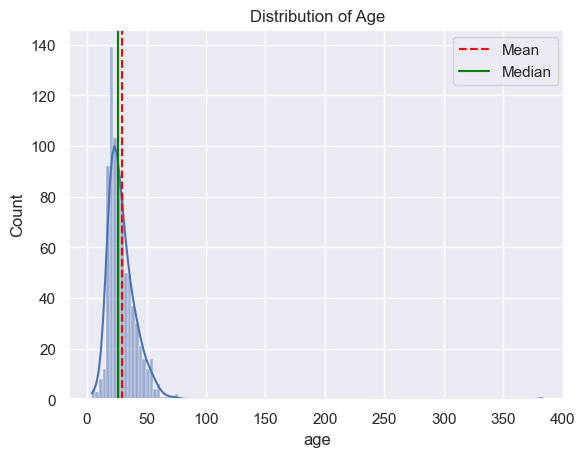

In [290]:
# Histogram for "age"

sns.histplot(df["age"], kde=True)
plt.title("Distribution of Age")

# calculate mean and median
age_mean = df["age"].mean()
age_median = df["age"].median()

print("Mean:", age_mean)
print("Median:", age_median)


# add vertical lines for mean and median
plt.axvline(age_mean, color="red", linestyle="--", label="Mean")
plt.axvline(age_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

Mean: 5.184041184041184
Median: 5.0


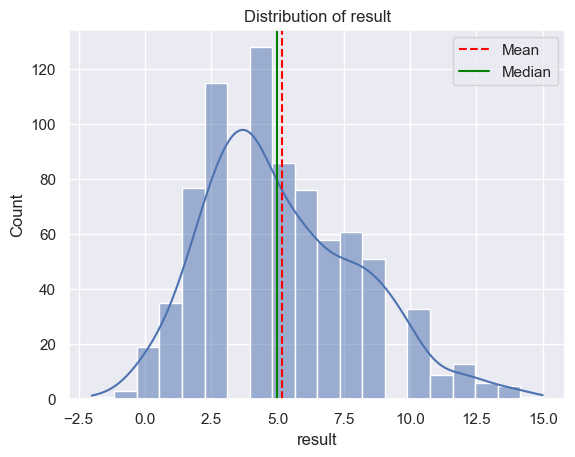

In [291]:
# Histogram for "result"

sns.histplot(df["result"], kde=True)
plt.title("Distribution of result")

# calculate mean and median
result_mean = df["result"].mean()
result_median = df["result"].median()

print("Mean:", result_mean)
print("Median:", result_median)


# add vertical lines for mean and median
plt.axvline(result_mean, color="red", linestyle="--", label="Mean")
plt.axvline(result_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

**Box plots for identifying outliers in the numerical columns**

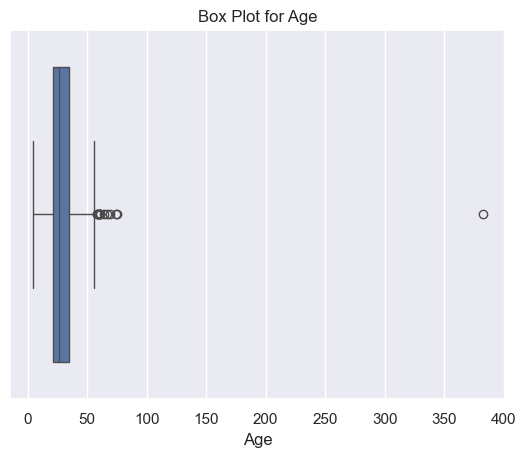

In [292]:
# box plot
sns.boxplot(x=df["age"])
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()

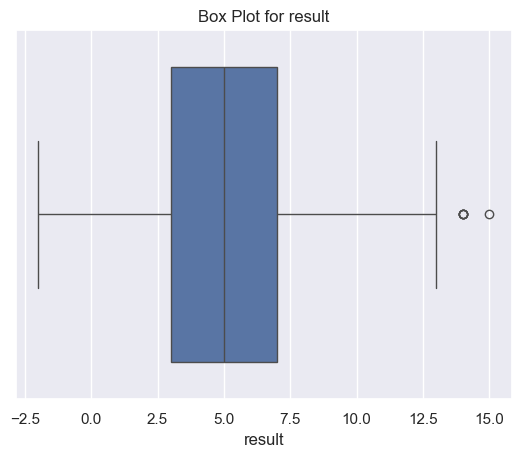

In [293]:
# box plot
sns.boxplot(x=df["result"])
plt.title("Box Plot for result")
plt.xlabel("result")
plt.show()

In [294]:
# count the outliers using IQR method
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]

In [295]:
len(age_outliers)

14

In [296]:
# count the outliers using IQR method
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]

In [297]:
len(result_outliers)

6

Univariate analysis of Categorical columns

In [298]:
df.dropna(inplace=True)
df.shape    

(777, 20)

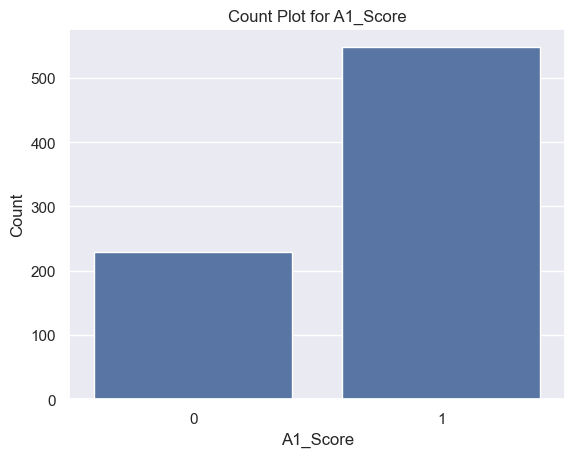

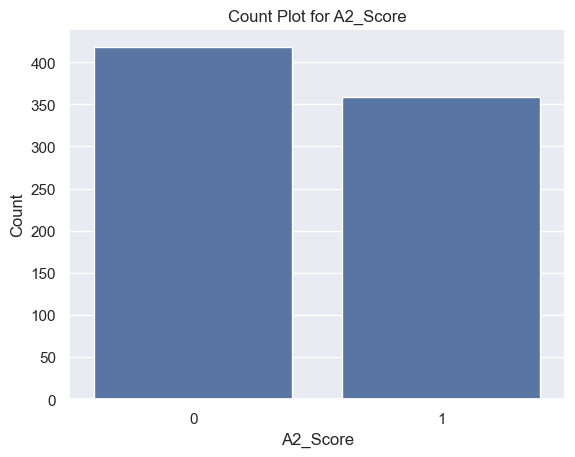

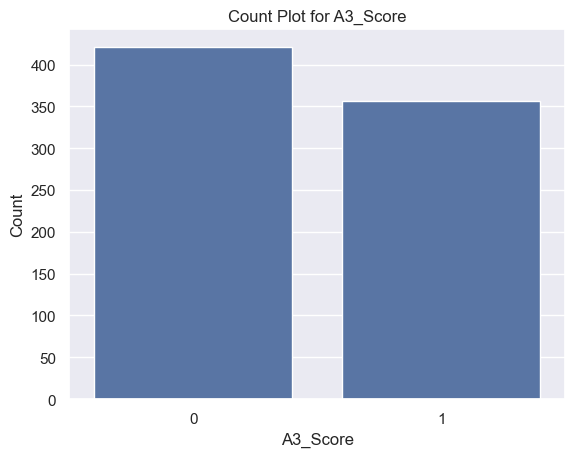

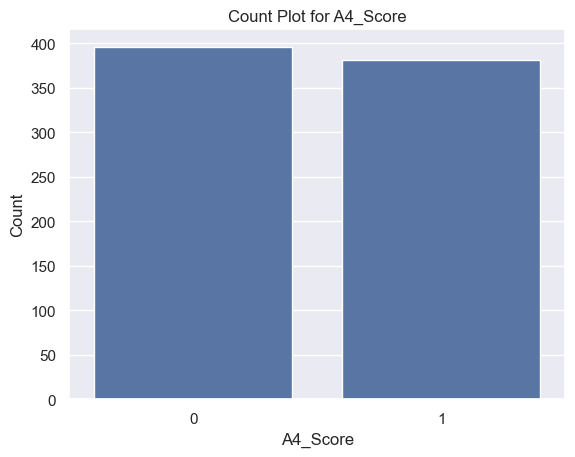

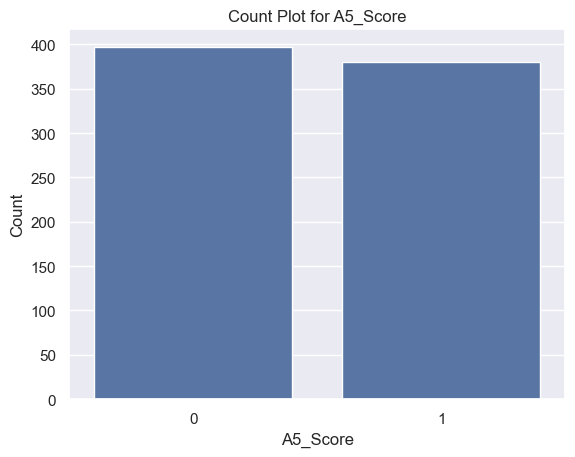

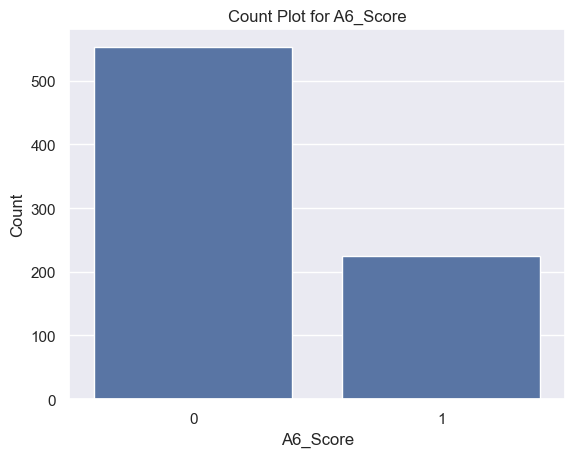

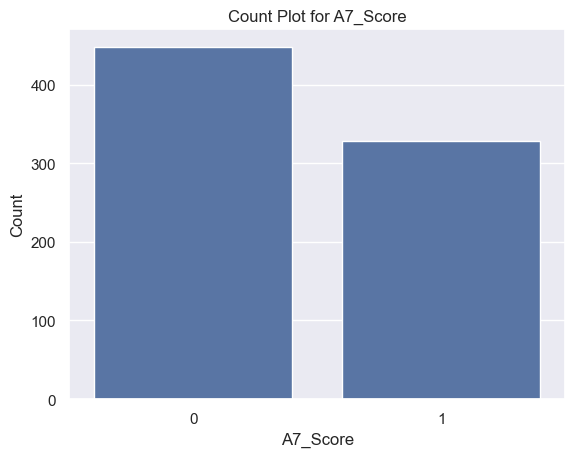

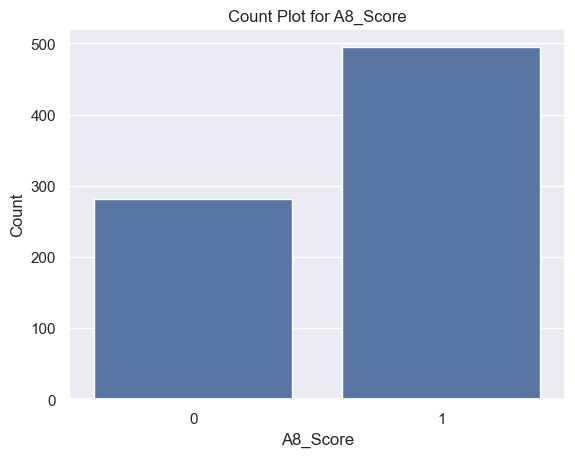

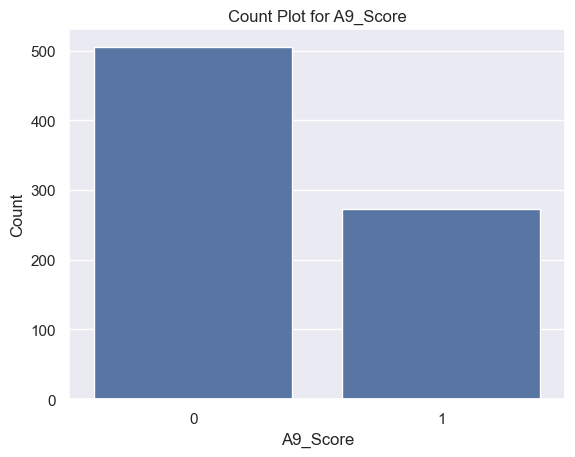

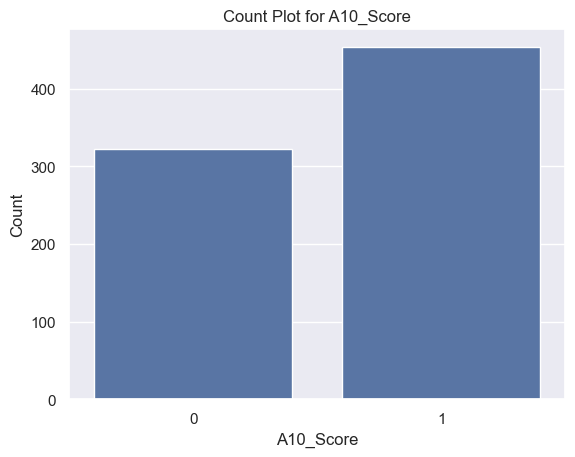

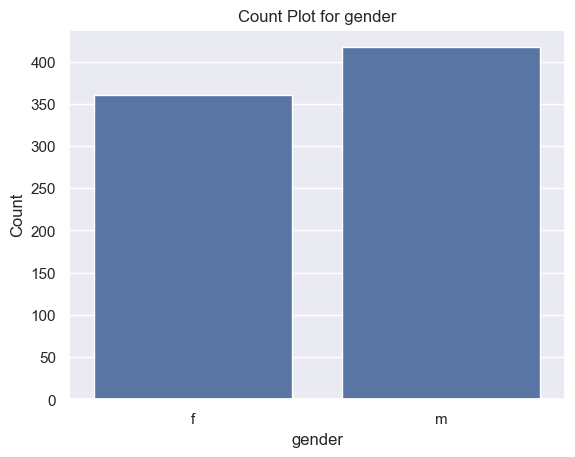

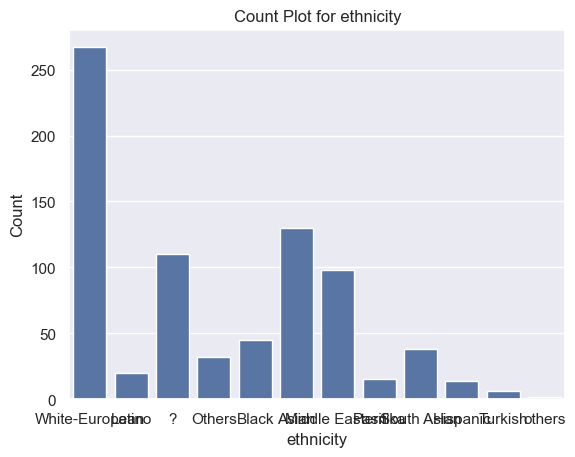

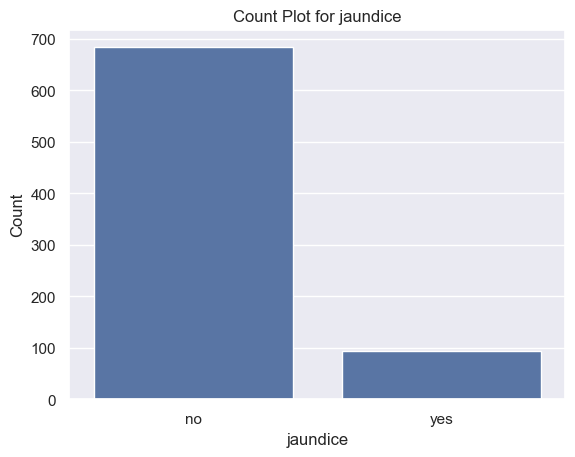

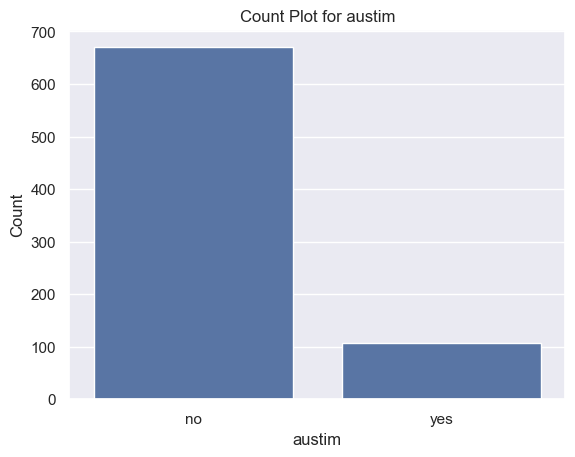

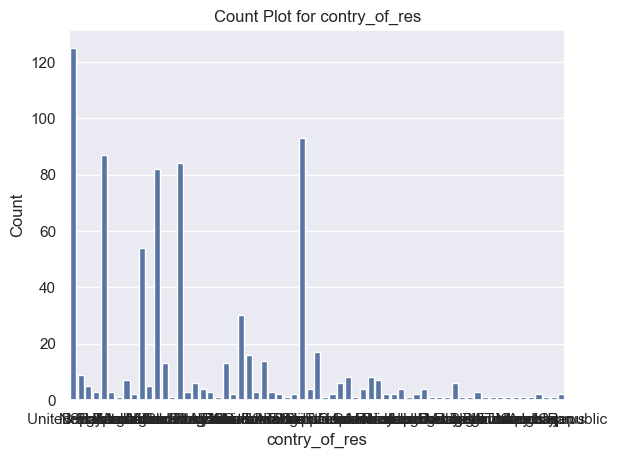

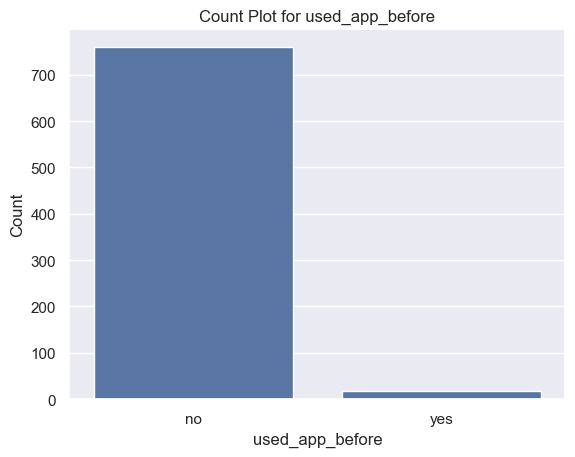

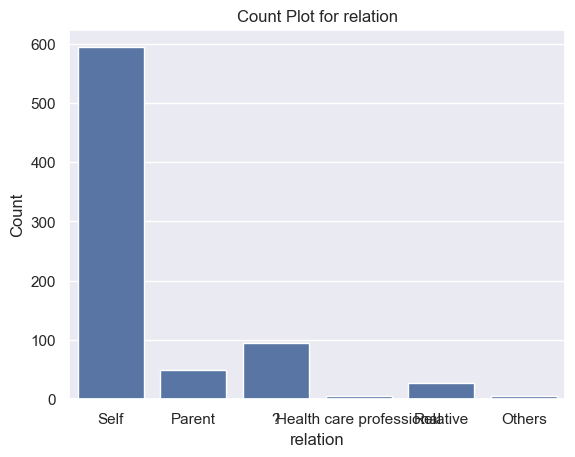

In [299]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation']

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(f"Count Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

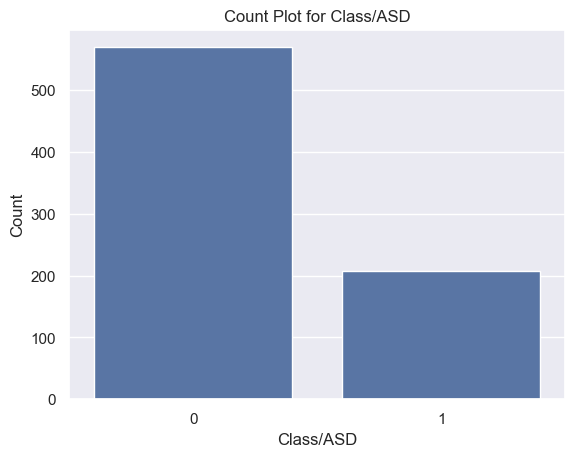

In [300]:
# countplot for target column (Class/ASD)
sns.countplot(x=df["Class/ASD"])
plt.title("Count Plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [301]:
df["Class/ASD"].value_counts()

Class/ASD
0    569
1    208
Name: count, dtype: int64

handle missing values in ethnicity and relation column

In [302]:
df["ethnicity"] = df["ethnicity"].replace({"?": "Others", "others": "Others"})

In [303]:
df["ethnicity"].unique()

array(['White-European', 'Latino', 'Others', 'Black', 'Asian',
       'Middle Eastern ', 'Pasifika', 'South Asian', 'Hispanic',
       'Turkish'], dtype=object)

In [304]:
df["relation"].unique()

array(['Self', 'Parent', '?', 'Health care professional', 'Relative',
       'Others'], dtype=object)

In [305]:
df["relation"] = df["relation"].replace(
    {"?": "Others",
     "Relative": "Others",
     "Parent": "Others",
     "Health care professional": "Others"}
)

In [306]:
df["relation"].unique()

array(['Self', 'Others'], dtype=object)

In [307]:
df.head()

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  age gender       ethnicity jaundice austim  \
0         1         0          0   26      f  White-European       no     no   
1         1         0          1   24      m          Latino       no    yes   
2         1         1          1   27      m          Latino      yes    yes   
3         1         0          1   35      f  White-European       no    yes   
4         1         0          0   40      f          Others       no     no   

   contry_of_res used_app_before  result relation  Class/ASD  
0  United States              no       6     Self          0  
1         Brazil              no       5     Self          0  
2          Spain              no       8   Others          1  
3  United States              no       6     Self          0  
4          Egypt              no       2   Others          0

**Label Encoding**

In [308]:
# identify columns with "object" data type
object_columns = df.select_dtypes(include=["object"]).columns

In [309]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [310]:
# initialize a dictionary to store the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column].astype(str))  # Convert values to strings
  encoders[column] = label_encoder   # saving the encoder for this column


# save the encoders as a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [311]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [312]:
df.head()

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  age  gender  ethnicity  jaundice  austim  \
0         1         0          0   26       0          9         0       0   
1         1         0          1   24       1          3         0       1   
2         1         1          1   27       1          3         1       1   
3         1         0          1   35       0          9         0       1   
4         1         0          0   40       0          5         0       0   

   contry_of_res  used_app_before  result  relation  Class/ASD  
0             62                0       6         1          0  
1             12                0       5         1          0  
2             54                0       8         0          1  
3             62                0       6         1          0  
4             21                0       2         0          0

Bivariate Analysis

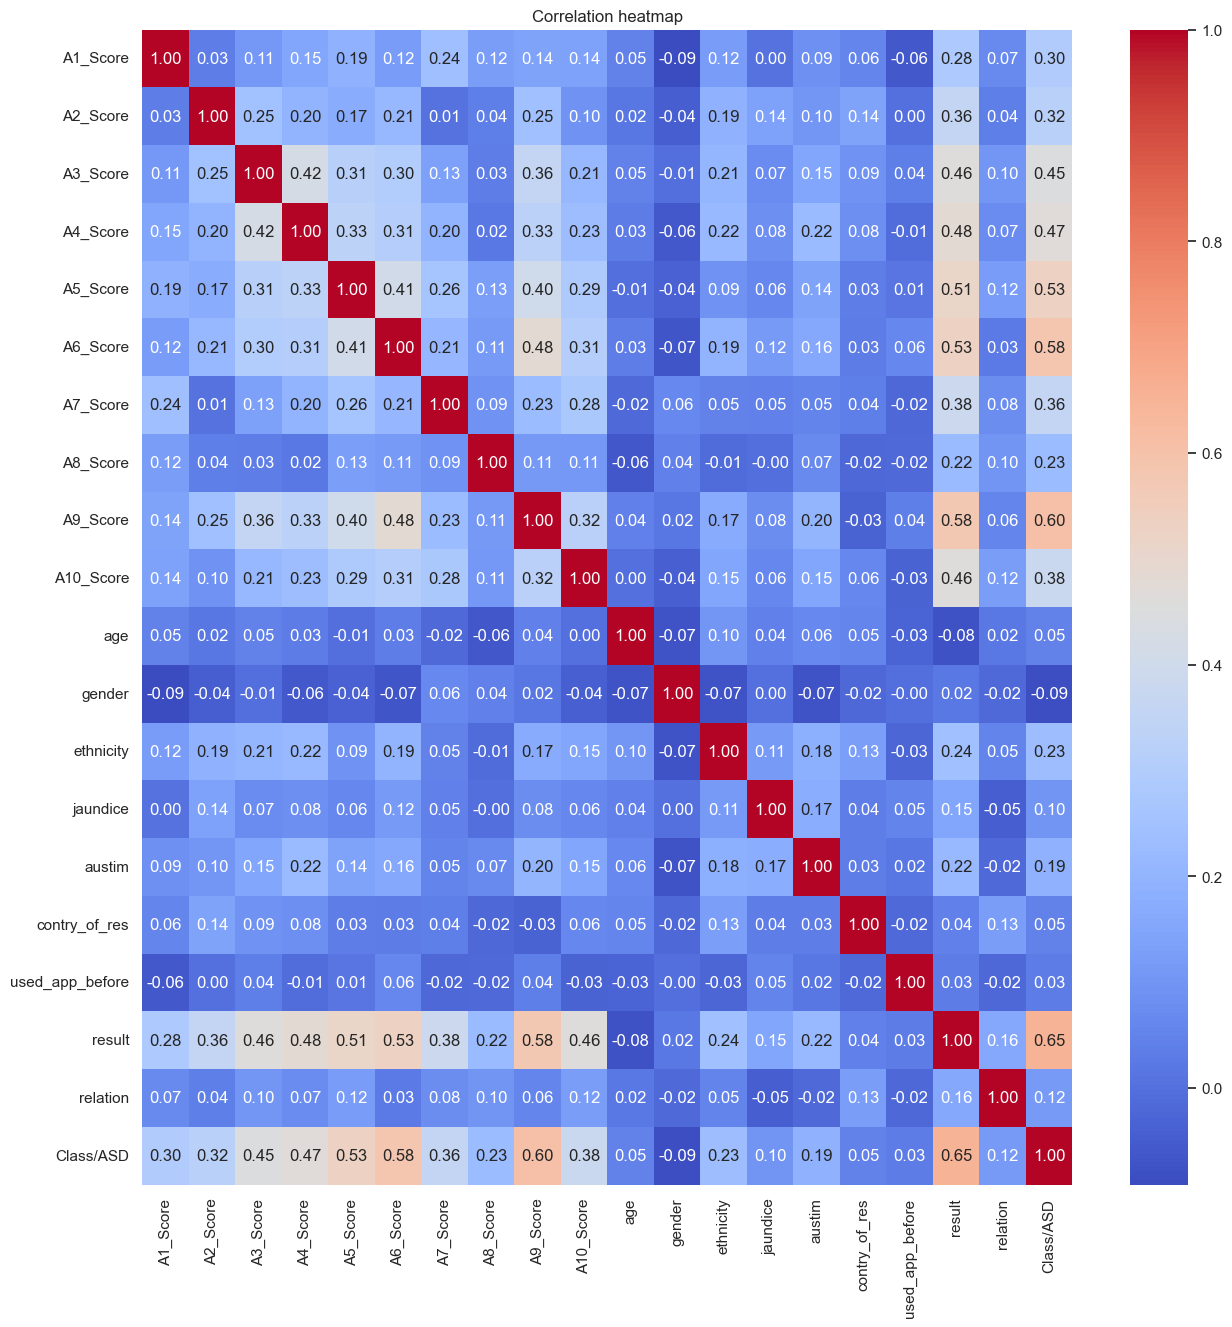

In [313]:
# correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

**Insights from EDA:**

- There are few outliers in the numerical columns (age, results)
- There is a class imbalance in the target column
- There is a class imbalance in the categorical features
- We don't have any highly correlated column
- performed label encoding and saved the encoders

**4. Data preprocessing**

Handling teh outliers

In [314]:
# function to replace the outliers with median
def replace_outliers_with_median(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  median = df[column].median()

  # replace outliers with median value
  df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

  return df

In [315]:
# replace outliers in the "age" column
df = replace_outliers_with_median(df, "age")

# replace outliers in the "result" column
df = replace_outliers_with_median(df, "result")

In [316]:
df.head()

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  austim  \
0         1         0          0  26.0       0          9         0       0   
1         1         0          1  24.0       1          3         0       1   
2         1         1          1  27.0       1          3         1       1   
3         1         0          1  35.0       0          9         0       1   
4         1         0          0  40.0       0          5         0       0   

   contry_of_res  used_app_before  result  relation  Class/ASD  
0             62                0     6.0         1          0  
1             12                0     5.0         1          0  
2             54                0     8.0         0          1  
3             62                0     6.0         1          0  
4             21                0     2.0         0          0

In [317]:
df.shape

(777, 20)

**Train Test Split**

In [318]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [319]:
X = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]

In [320]:
print(X)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         1         1         1         0         0         1   
1           1         1         0         1         0         0         0   
2           1         1         0         1         1         0         1   
3           1         1         0         1         0         0         1   
4           1         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
199         1         1         0         1         1         0         0   
365         0         1         0         1         0         0         1   
486         1         1         1         0         0         0         0   
594         0         0         0         0         0         0         0   
568         1         0         1         0         0         1         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [321]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
199    0
365    0
486    0
594    0
568    0
Name: Class/ASD, Length: 777, dtype: int64


In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [323]:
print(y_train.shape)
print(y_test.shape)

(621,)
(156,)


In [324]:
y_train.value_counts()

Class/ASD
0    456
1    165
Name: count, dtype: int64

In [325]:
y_test.value_counts()

Class/ASD
0    113
1     43
Name: count, dtype: int64

**SMOTE (Synthetic Minority Oversampling technique)**

In [326]:
smote = SMOTE(random_state=42)

In [327]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [328]:
print(y_train_smote.shape)

(912,)


In [329]:
print(y_train_smote.value_counts())

Class/ASD
1    456
0    456
Name: count, dtype: int64


**5. Model Training**

In [330]:
# dictionary of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [ ]:
# dictionary to store the cross validation results
cv_scores = {}

# perform cross-validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters...")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
  print("-"*50)

Training Decision Tree with default parameters...
Decision Tree Cross-Validation Accuracy: 0.96
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross-Validation Accuracy: 0.97
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost Cross-Validation Accuracy: 0.98
--------------------------------------------------


In [332]:
cv_scores

{'Decision Tree': array([0.9726776 , 0.95628415, 0.97252747, 0.94505495, 0.95054945]),
 'Random Forest': array([0.98360656, 0.9726776 , 0.98901099, 0.95604396, 0.97252747]),
 'XGBoost': array([0.98907104, 0.96721311, 0.98351648, 0.96703297, 0.97252747])}

**6. Model Selection & Hyperparameter Tuning**

In [333]:
# Initializing models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [334]:
# Hyperparameter grids for RandomizedSearchCV

param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}


param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}


In [ ]:
# RandomizedSearchCV for hyperparameter tuning
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgb, n_iter=20, cv=5, scoring="accuracy", random_state=42)


In [336]:
# fit the models
random_search_dt.fit(X_train_smote, y_train_smote)
random_search_rf.fit(X_train_smote, y_train_smote)
random_search_xgb.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [337]:
# Get the model with best score

best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_model = random_search_dt.best_estimator_
  best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
  best_model = random_search_rf.best_estimator_
  best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
  best_model = random_search_xgb.best_estimator_
  best_score = random_search_xgb.best_score_



In [338]:
print(f"Best Model: {best_model}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)
Best Cross-Validation Accuracy: 0.98


In [339]:
# save the best model
with open("best_model.pkl", "wb") as f:
  pickle.dump(best_model, f)

**7. Evaluation**

In [340]:
# evaluate on test data
y_test_pred = best_model.predict(X_test)
print("Accuracy score:\n", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy score:
 0.967948717948718
Confusion Matrix:
 [[108   5]
 [  0  43]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       113
           1       0.90      1.00      0.95        43

    accuracy                           0.97       156
   macro avg       0.95      0.98      0.96       156
weighted avg       0.97      0.97      0.97       156



**8. Find best parms for svm and lr**

In [341]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Define parameter grids
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [200, 500, 1000]
}

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Perform GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_lr, cv=3, scoring="accuracy")
grid_search_lr.fit(X_train_scaled, y_train_smote)

# Perform GridSearchCV for SVM
grid_search_svm = GridSearchCV(estimator=SVC(probability=True), param_grid=param_grid_svm, cv=3, scoring="accuracy")
grid_search_svm.fit(X_train_scaled, y_train_smote)

# Get the best parameters
best_params_lr = grid_search_lr.best_params_
best_params_svm = grid_search_svm.best_params_

print("Best Parameters for Logistic Regression:", best_params_lr)
print("Best Parameters for SVM:", best_params_svm)

Best Parameters for Logistic Regression: {'C': 1, 'max_iter': 200, 'solver': 'liblinear'}
Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


**9. Creating the Ensemble Model**

In [342]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define base models with best parameters
rf_model = RandomForestClassifier(**random_search_rf.best_params_)
xgb_model = XGBClassifier(**random_search_xgb.best_params_)
lr_model = LogisticRegression(**best_params_lr)
svm_model = SVC(probability=True, **best_params_svm)

# Define the stacking ensemble
stacking_model = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lr', lr_model),
        ('svm', svm_model)
    ],
    final_estimator=LogisticRegression()
)

# Train the stacking model
stacking_model.fit(X_train_smote, y_train_smote)

# Evaluate the stacking model
y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Stacking Model Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Stacking Model Accuracy: 0.9615384615384616
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       113
           1       0.88      1.00      0.93        43

    accuracy                           0.96       156
   macro avg       0.94      0.97      0.95       156
weighted avg       0.97      0.96      0.96       156

Confusion Matrix:
[[107   6]
 [  0  43]]


**10. Testing and Manging Weights**

In [343]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define base models
rf_model = RandomForestClassifier(**random_search_rf.best_params_)
xgb_model = XGBClassifier(**random_search_xgb.best_params_)
lr_model = LogisticRegression(**best_params_lr)
svm_model = SVC(probability=True, **best_params_svm)

# Define the VotingClassifier with weights
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lr', lr_model),
        ('svm', svm_model)
    ],
    voting='soft'  # Use soft voting for probabilities
)

# Define the parameter grid for weights
param_grid = {
    'weights': [
        [1, 1, 1, 1],  # Equal weights
        [2, 1, 1, 1],  # More weight to Random Forest
        [1, 2, 1, 1],  # More weight to XGBoost
        [1, 1, 2, 1],  # More weight to Logistic Regression
        [1, 1, 1, 2],  # More weight to SVM
        [2, 2, 1, 1],  # More weight to RF and XGBoost
        [1, 1, 2, 2],  # More weight to LR and SVM
        [3, 1, 1, 1],  # Heavily weighted RF
        [1, 3, 1, 1],  # Heavily weighted XGBoost
    ]
}

# Perform GridSearchCV to find the best weights
grid_search = GridSearchCV(estimator=voting_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

# Get the best weights
best_weights = grid_search.best_params_['weights']
print("Best Weights:", best_weights)

# Evaluate the best model
best_voting_clf = grid_search.best_estimator_
y_pred = best_voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Optimized Weights:", accuracy)

Best Weights: [2, 2, 1, 1]
Accuracy with Optimized Weights: 0.9615384615384616


In [345]:
# Save the ensemble model to a file
with open("ensemble_model.pkl", "wb") as f:
    pickle.dump(best_voting_clf, f)

**11. Ensemble vs RF**

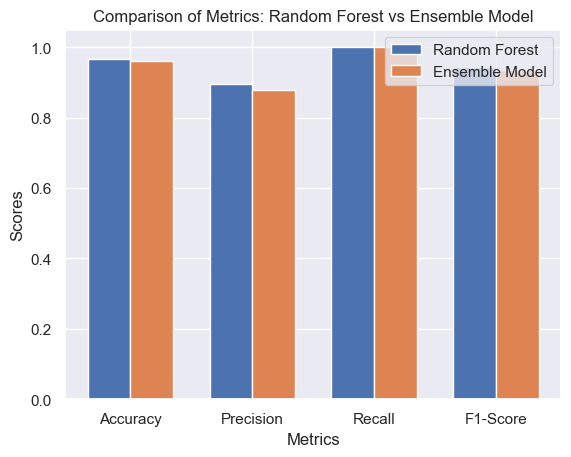

In [344]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics for Random Forest (best_model)
y_pred_rf = best_model.predict(X_test)
rf_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-Score": f1_score(y_test, y_pred_rf)
}

# Calculate metrics for Stacking Model
ensemble_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred)
}

# Plot metrics
labels = list(rf_metrics.keys())
rf_values = list(rf_metrics.values())
ensemble_values = list(ensemble_metrics.values())

x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, rf_values, width, label='Random Forest')
plt.bar(x + width/2, ensemble_values, width, label='Ensemble Model')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Metrics: Random Forest vs Ensemble Model')
plt.xticks(x, labels)
plt.legend()
plt.show()

**12. LIME and SHAP Analysis for XAI**

Using 1160 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 100/100 [1:40:44<00:00, 60.45s/it]


<Figure size 640x480 with 0 Axes>

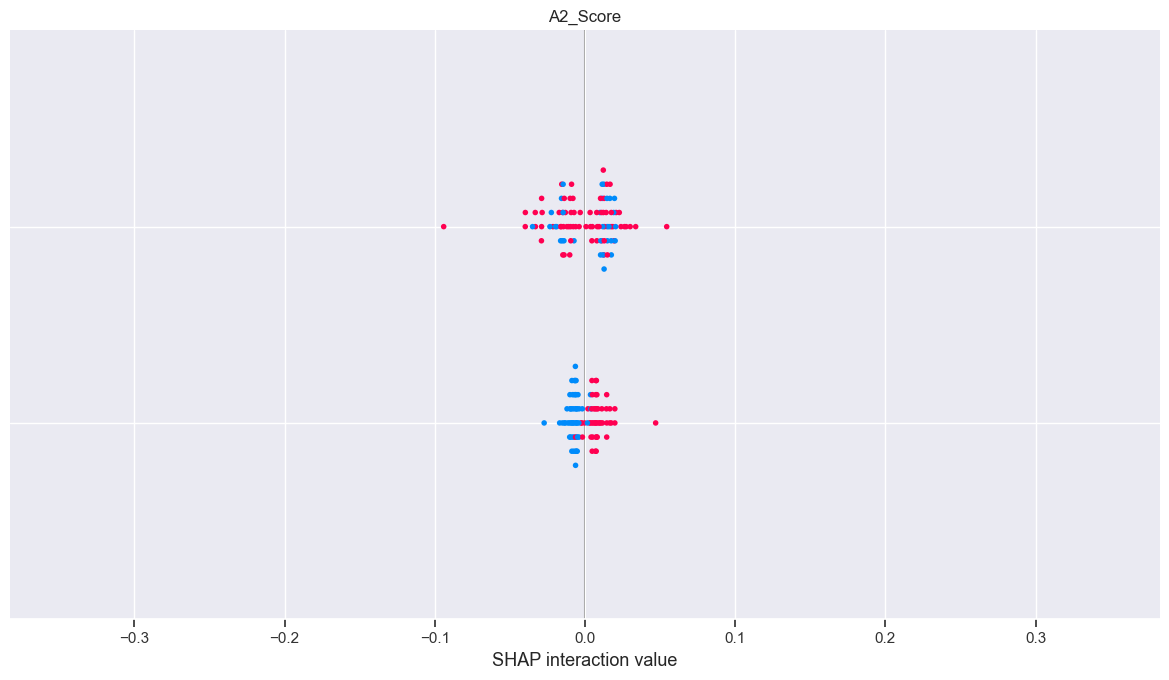

In [108]:
import shap

# Train the individual models
rf_model.fit(X_train_smote, y_train_smote)
xgb_model.fit(X_train_smote, y_train_smote)
lr_model.fit(X_train_smote, y_train_smote)
svm_model.fit(X_train_smote, y_train_smote)

# Initialize SHAP explainers for individual models
explainer_rf = shap.TreeExplainer(rf_model)
explainer_xgb = shap.TreeExplainer(xgb_model)
explainer_lr = shap.LinearExplainer(lr_model, X_train_smote)
explainer_svm = shap.KernelExplainer(svm_model.predict_proba, X_train_smote)

# Calculate SHAP values for a sample of the test set
X_sample = X_test[:100]  # Use a subset for efficiency
shap_values_rf = explainer_rf.shap_values(X_sample)
shap_values_xgb = explainer_xgb.shap_values(X_sample)
shap_values_lr = explainer_lr.shap_values(X_sample)
shap_values_svm = explainer_svm.shap_values(X_sample)

# Visualize SHAP values for one model (e.g., Random Forest)
shap.summary_plot(shap_values_rf, X_sample, feature_names=X_test.columns)

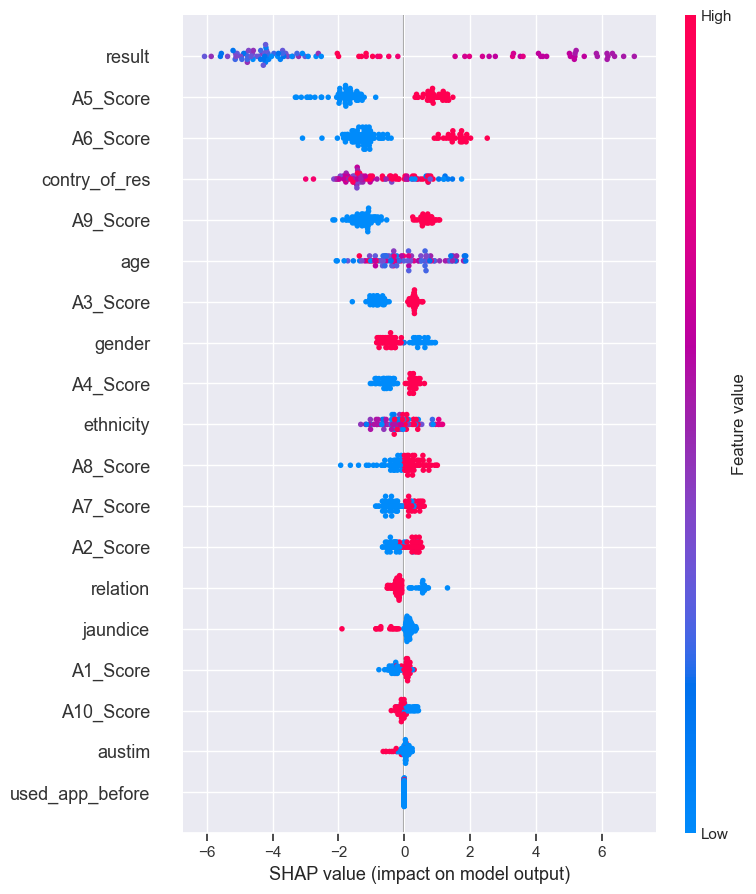

In [117]:
shap.summary_plot(shap_values_xgb, X_sample, feature_names=X_test.columns)

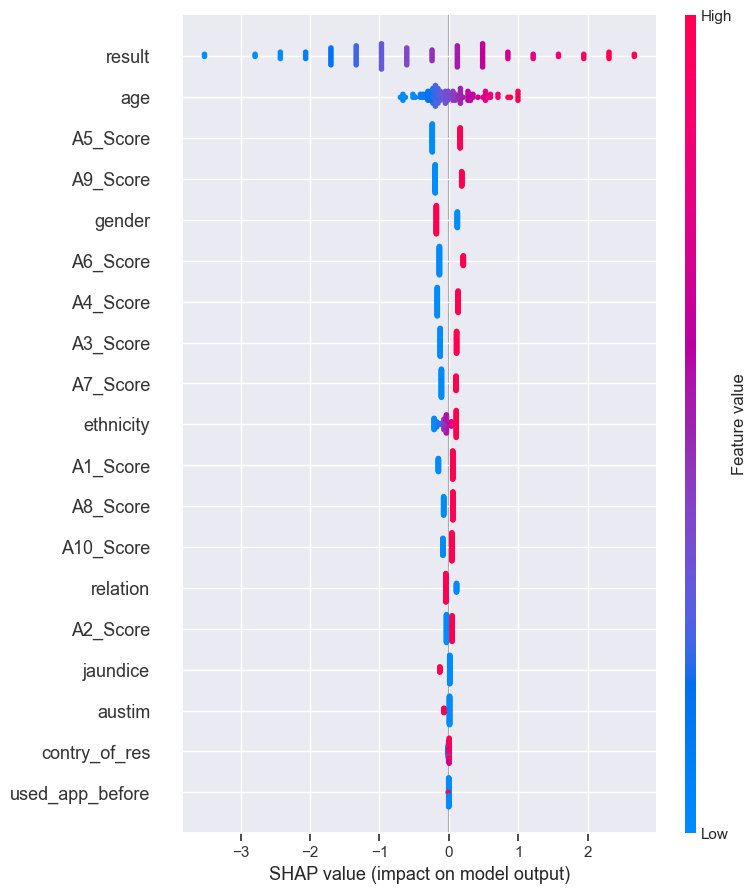

In [119]:
shap.summary_plot(shap_values_lr, X_sample, feature_names=X_test.columns)

<Figure size 640x480 with 0 Axes>

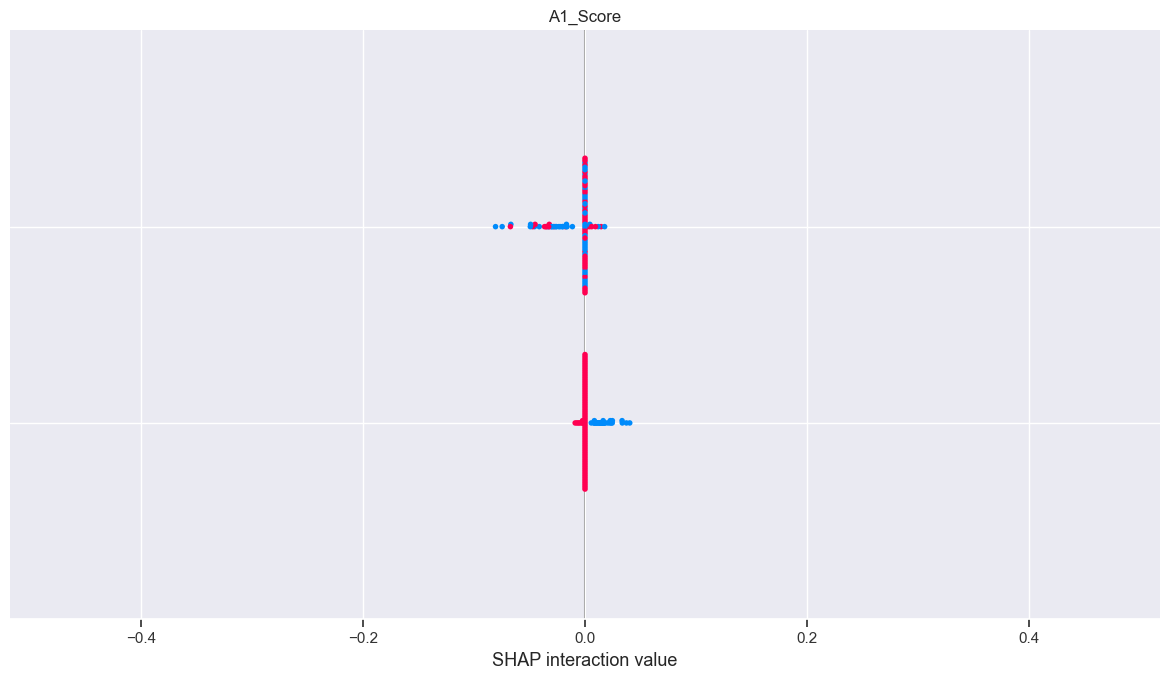

In [138]:
shap.summary_plot(shap_values_svm, X_sample, feature_names=X_test.columns)

<Figure size 640x480 with 0 Axes>

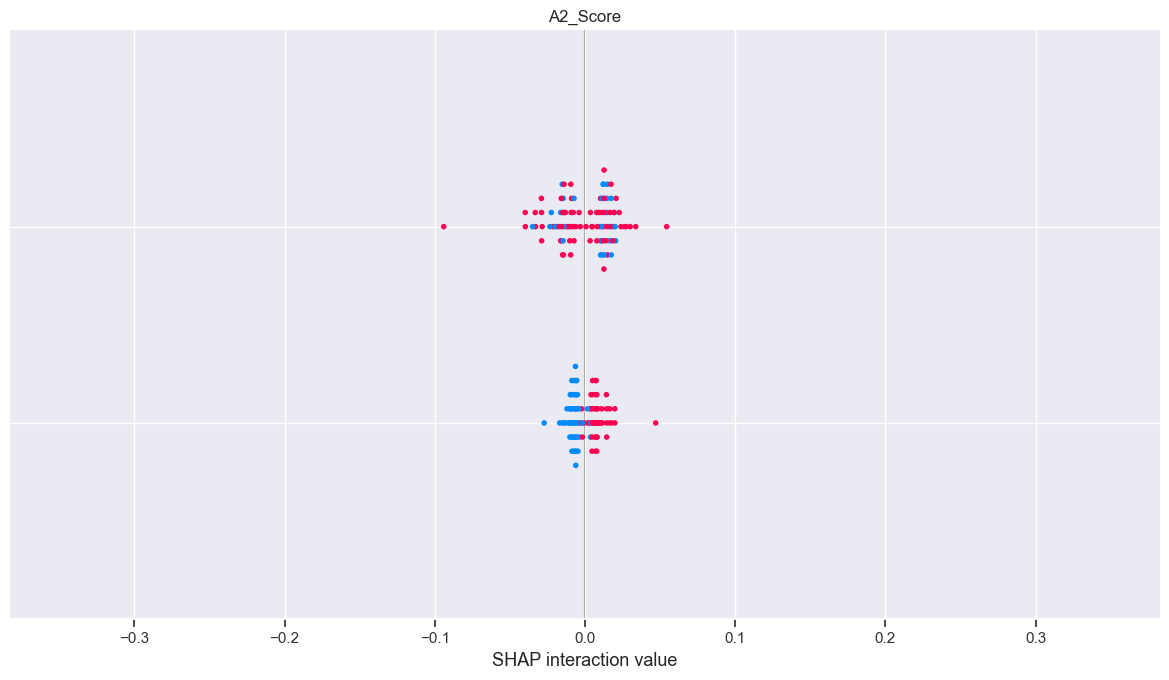

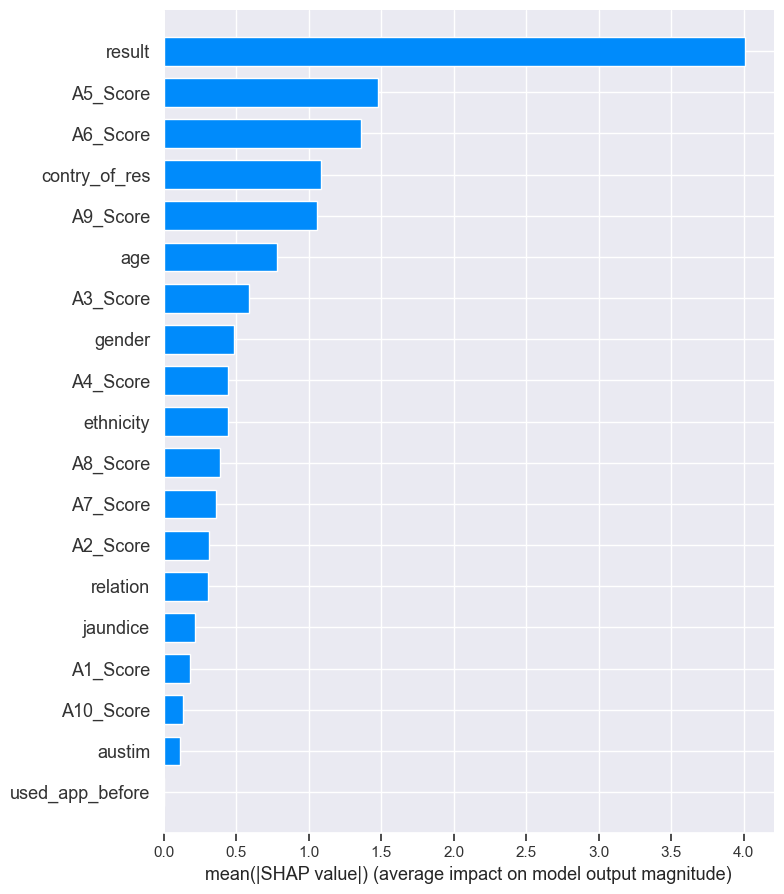

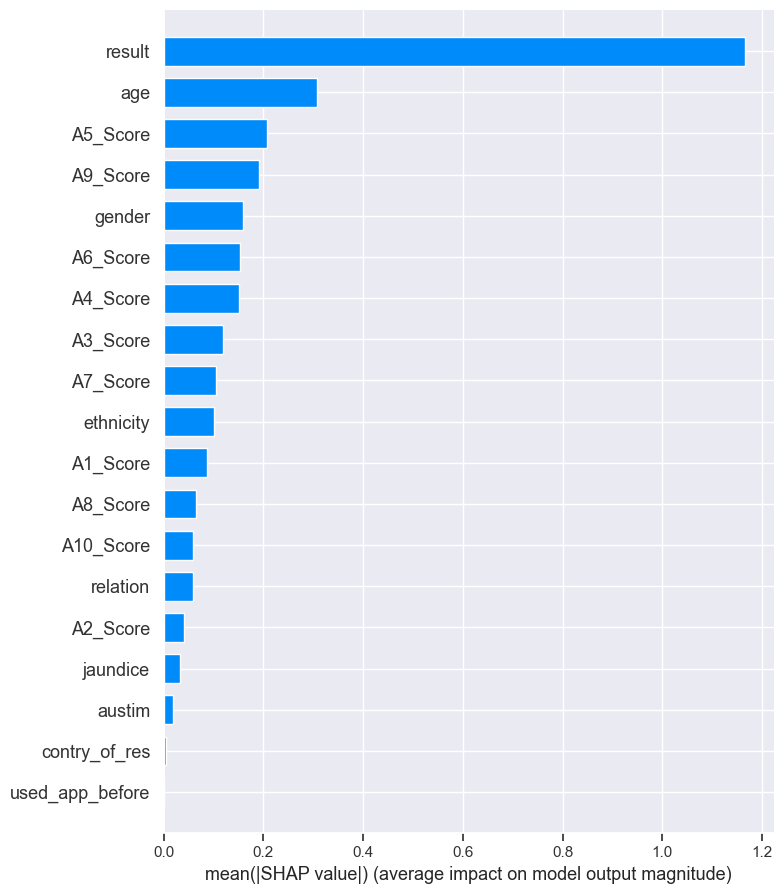

<Figure size 640x480 with 0 Axes>

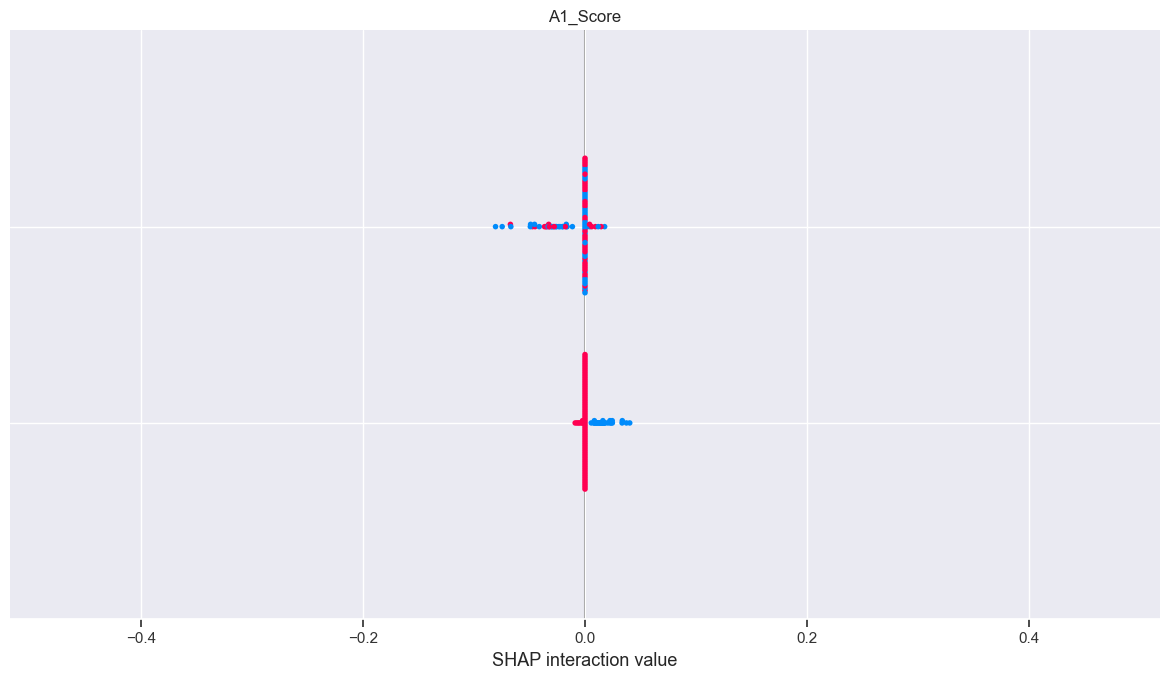

In [140]:
# Ensure SHAP values and feature matrix have the same number of rows
X_sample_rf = X_test[:len(shap_values_rf)]
X_sample_xgb = X_test[:len(shap_values_xgb)]
X_sample_lr = X_test[:len(shap_values_lr)]
X_sample_svm = X_test[:len(shap_values_svm)]

# Bar chart for SHAP values of Random Forest
shap.summary_plot(shap_values_rf, X_sample_rf, feature_names=X_test.columns, plot_type="bar")

# Bar chart for SHAP values of XGBoost
shap.summary_plot(shap_values_xgb, X_sample_xgb, feature_names=X_test.columns, plot_type="bar")

# Bar chart for SHAP values of Logistic Regression
shap.summary_plot(shap_values_lr, X_sample_lr, feature_names=X_test.columns, plot_type="bar")

# Bar chart for SHAP values of SVM
shap.summary_plot(shap_values_svm, X_sample_svm, feature_names=X_test.columns, plot_type="bar")

In [147]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Convert training data to NumPy array
X_train_smote_array = X_train_smote.to_numpy()
X_test_array = X_test.to_numpy()

# Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train_smote_array,
    feature_names=X_test.columns.tolist(),
    class_names=['Class 0', 'Class 1'],  # Replace with your class labels
    mode='classification'
)

# Explain a single prediction (e.g., the first test sample)
i = 0  # Index of the test sample to explain
exp = explainer.explain_instance(
    data_row=X_test_array[i],
    predict_fn=stacking_model.predict_proba
)

# Visualize the explanation
exp.show_in_notebook(show_table=True)

c:\Users\Acer\Downloads\AI\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Acer\Downloads\AI\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Acer\Downloads\AI\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [152]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Convert training data to NumPy array
X_train_smote_array = X_train_smote.to_numpy()
X_test_array = X_test.to_numpy()

# Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train_smote_array,
    feature_names=X_test.columns.tolist(),
    class_names=['Class 0', 'Class 1'],  # Replace with your class labels
    mode='classification'
)

# Explain a single prediction (e.g., the first test sample)
i = 0  # Index of the test sample to explain
exp = explainer.explain_instance(
    data_row=X_test_array[i],
    predict_fn=best_model.predict_proba
)

# Visualize the explanation
exp.show_in_notebook(show_table=True)


c:\Users\Acer\Downloads\AI\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Explanation saved to 'lime_explanation.html'. Open this file in a browser to view it.


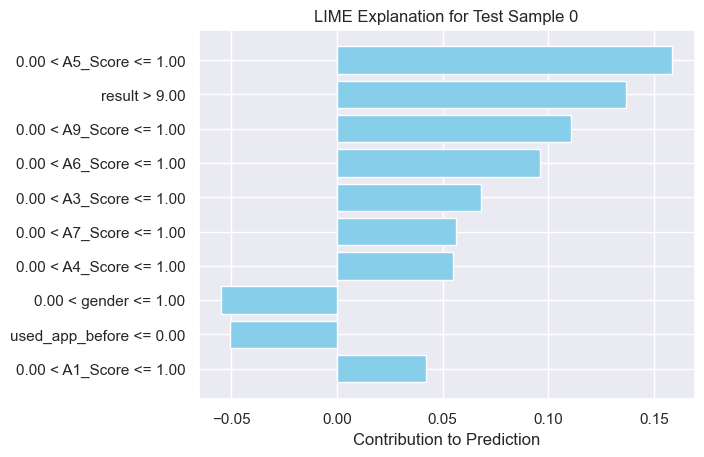

In [153]:
import matplotlib.pyplot as plt

# Get the explanation as a list of tuples (feature, contribution)
explanation = exp.as_list()

# Separate features and contributions
features = [x[0] for x in explanation]
contributions = [x[1] for x in explanation]

# Plot the contributions as a bar chart
plt.barh(features, contributions, color='skyblue')
plt.xlabel('Contribution to Prediction')
plt.title(f'LIME Explanation for Test Sample {i}')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

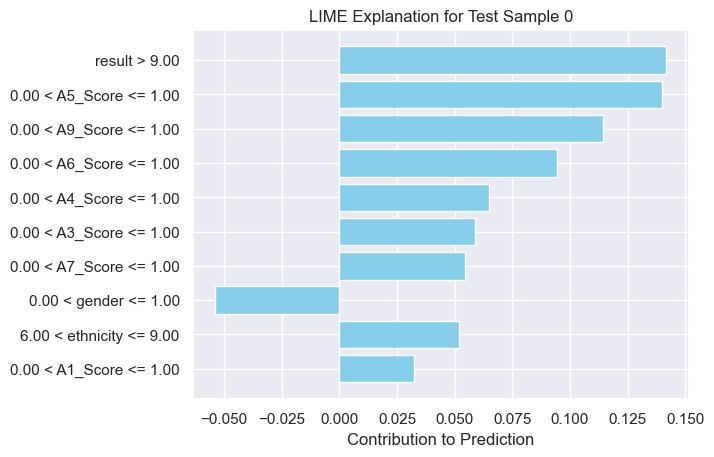

In [150]:
import matplotlib.pyplot as plt

# Get the explanation as a list of tuples (feature, contribution)
explanation = exp.as_list()

# Separate features and contributions
features = [x[0] for x in explanation]
contributions = [x[1] for x in explanation]

# Plot the contributions as a bar chart
plt.barh(features, contributions, color='skyblue')
plt.xlabel('Contribution to Prediction')
plt.title(f'LIME Explanation for Test Sample {i}')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

c:\Users\Acer\Downloads\AI\venv\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\Acer\Downloads\AI\venv\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\Acer\Downloads\AI\venv\lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access 

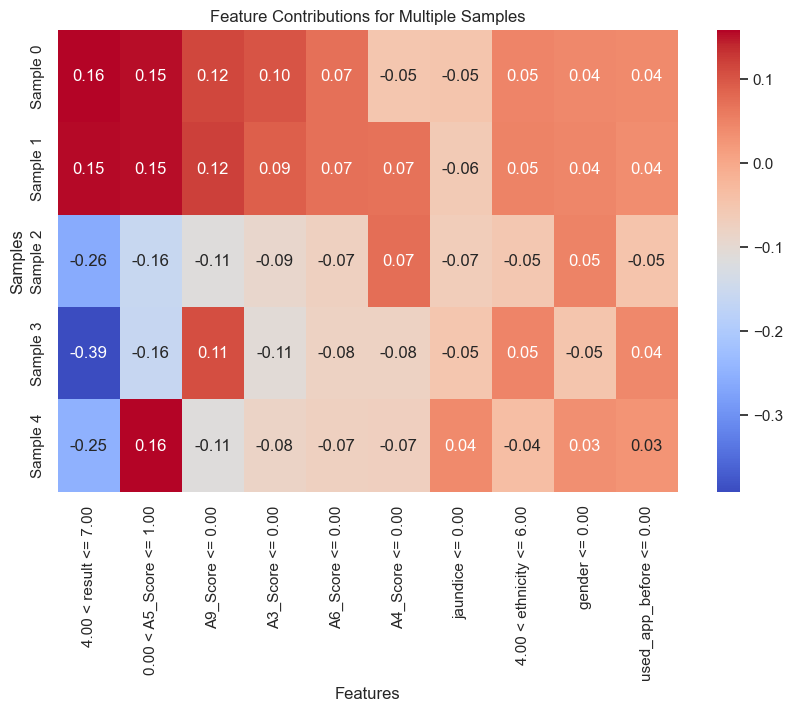

In [151]:
import seaborn as sns

# Explain multiple samples
num_samples = 5  # Number of test samples to explain
contributions_matrix = []

for i in range(num_samples):
    exp = explainer.explain_instance(
        data_row=X_test.iloc[i],
        predict_fn=stacking_model.predict_proba
    )
    contributions = [x[1] for x in exp.as_list()]
    contributions_matrix.append(contributions)

# Convert to a DataFrame for visualization
contributions_df = pd.DataFrame(
    contributions_matrix,
    columns=[x[0] for x in exp.as_list()],
    index=[f'Sample {i}' for i in range(num_samples)]
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contributions_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Contributions for Multiple Samples')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()